# [TEMPLATE] DATASET DEPURADO

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [3]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

<hr>

# Correlacion: Precio en funcion de Habitaciones

- **Categoria:** `Habitaciones`.
- **Objetivo:** Investigar la influencia que tiene el numero de habitaciones sobre el precio.

In [4]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'

In [5]:
hab = df.copy()
hab['habitaciones'].value_counts()

 3     121887
 2      57808
 4      25068
-1      22471
 1       5069
 5       4596
 6       1669
 7        539
 8        398
 10       316
 9        179
Name: habitaciones, dtype: int64

In [6]:
# Como vemos, hay 22471 valores nulos (definidos como -1), por lo que vamos a empezar por eliminar dichos datos.

In [7]:
hab = hab.loc[df['habitaciones'] != -1][['id', 'tipodepropiedad', 'ciudad', 'provincia', 'habitaciones', 'precio']]

In [8]:
hab.shape

(217529, 6)

In [9]:
hab.head()

,id,tipodepropiedad,ciudad,provincia,habitaciones,precio
0,254099,Apartamento,Benito Juárez,Distrito Federal,2,2273000
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,3,3600000
2,247984,Casa,Tonalá,Jalisco,3,1200000
3,209067,Casa,Zinacantepec,Edo. de México,2,650000
4,185997,Apartamento,Zapopan,Jalisco,2,1150000


In [10]:
# Nos puede interesar mostrar en un mismo grafico la relacion entre habitaciones y precio, para
# los distintos tipos de propiedad. Para esto, nos fijaremos cuales son los tipos de propiedad mas 
# comunes.

In [11]:
hab['tipodepropiedad'].value_counts(normalize=True).map(lambda x: x*100)

Casa                             63.622236
Apartamento                      25.906548
Casa en condominio                8.773293
Casa uso de suelo                 0.230804
Terreno                           0.219769
Local Comercial                   0.172413
Quinta Vacacional                 0.166436
Duplex                            0.156321
Oficina comercial                 0.148965
Edificio                          0.139310
Villa                             0.139310
Bodega comercial                  0.072184
Rancho                            0.065287
Departamento Compartido           0.062988
Inmuebles productivos urbanos     0.038161
Terreno comercial                 0.033103
Otros                             0.031724
Local en centro comercial         0.010115
Nave industrial                   0.005977
Huerta                            0.003218
Terreno industrial                0.001379
Hospedaje                         0.000460
Lote                              0.000000
Garage     

In [12]:
# Vemos que practicamente el 90% de los datos se distribuyen entre solamente dos tipos, por lo que reagruparemos:

In [13]:
hab['tipodepropiedad'] = hab['tipodepropiedad'].map(lambda x: x if x in ['Casa', 'Apartamento'] else 'Otros')

In [14]:
# Tambien podemos ver que la mayoria de las casas tienen 4 o menos habitaciones:
hab['habitaciones'].value_counts(normalize=True).map(lambda x: x*100)

3     56.032529
2     26.574847
4     11.523981
1      2.330264
5      2.112822
6      0.767254
7      0.247783
8      0.182964
10     0.145268
9      0.082288
Name: habitaciones, dtype: float64

In [15]:
hab['habitaciones'] = hab['habitaciones'].map(lambda x: str(x) if x in [1, 2, 3, 4] else '5 o mas')

In [16]:
#hab.groupby('habitaciones')['precio'].agg(['mean']).astype({'mean':'uint32'})
hab = hab.groupby(['habitaciones', 'tipodepropiedad'])['precio'].agg(['mean']).astype({'mean':'uint32'})

In [17]:
hab = hab.unstack()
hab.columns = ['Apartamento', 'Casa', 'Otros']
hab = hab[['Casa', 'Apartamento', 'Otros']]
hab

,Casa,Apartamento,Otros
habitaciones,,,
1,1056945,2185763,1926405
2,970532,2152655,1437405
3,2507186,3552820,3080215
4,3345206,5387999,4181437
5 o mas,3190014,4259473,4432406


In [18]:
hab['Casa'].to_list()

[1056945, 970532, 2507186, 3345206, 3190014]

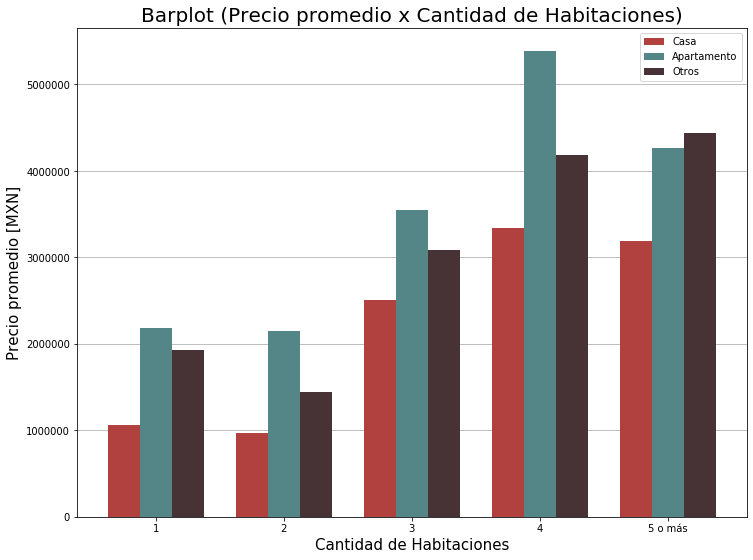

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12,9]
plt.rc('axes', axisbelow=True)

barWidth = 0.25
bars1 = hab['Casa'].to_list()
bars2 = hab['Apartamento'].to_list()
bars3 = hab['Otros'].to_list()
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color=rojo, width=barWidth, label='Casa')
plt.bar(r2, bars2, color=azul, width=barWidth, label='Apartamento')
plt.bar(r3, bars3, color=marron, width=barWidth, label='Otros')

plt.title("Barplot (Precio promedio x Cantidad de Habitaciones)", fontsize=20)
plt.xlabel('Cantidad de Habitaciones', fontsize=15)
plt.ylabel('Precio promedio [MXN]', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bars1))], ['1', '2', '3', '4', '5 o más'])
plt.grid(True, axis='y')
plt.legend()

plt.savefig('./precio_habitaciones.png', transparent=True, bbox_inches = "tight")
plt.savefig('./precio_habitaciones.jpg', bbox_inches = "tight")

In [20]:
# Como vemos, obtuvimos los resultados esperados: linealidad entre las variables.